[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
{'df':             Adj Close  Cul_Percent_Change  Daily_Returns
Date                                                    
2003-01-21  13.228972         1222.897243            NaN
2003-01-22  13.203705         1220.370483      -0.001910
2003-01-23  13.400232         1240.023232       0.014884
2003-01-24  13.209319         1220.931911      -0.014247
2003-01-27  13.125099         1212.509918      -0.006376
...               ...                 ...            ...
2023-01-11  42.139450         4113.945007       0.008971
2023-01-12  42.228188         4122.818756       0.002106
2023-01-13  43.598656         4259.865570       0.032454
2023-01-17  43.500057         4250.005722      -0.002262
2023-01-18  42.770458         4177.045822      -0.016772

[5034 rows x 3 columns], 'sr': 0, 'cr': 0}
0.34257812942432414,29.54148578643799
[1.8537103418824388, 0.000206878

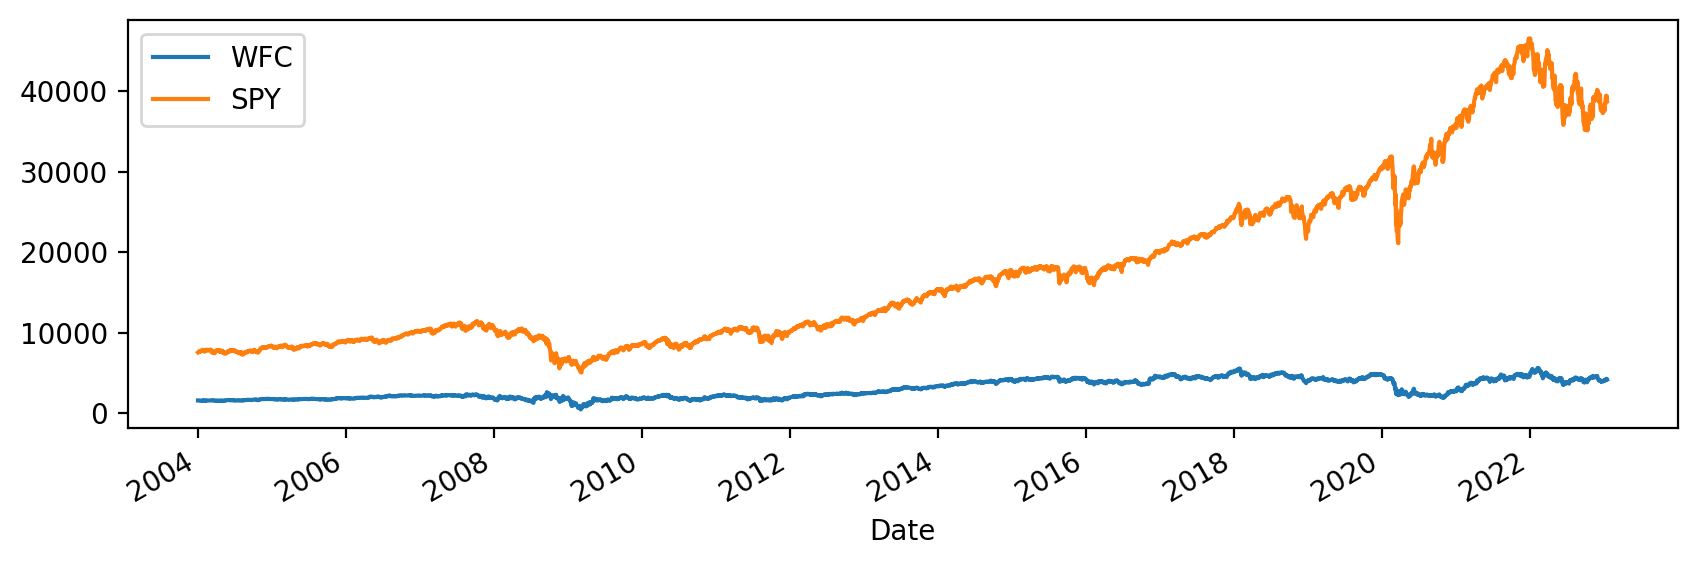

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import linregress
    
# Main DataFrame
df = pd.DataFrame(yf.download('WFC', start = '2003-01-19',end='2023-01-19')['Adj Close'])

# For linear regression to represent the market.
SPY_DF= pd.DataFrame(yf.download('SPY', start = '2003-01-19',end='2023-01-19')['Adj Close'])

# Cumulative Percentage Change and Daily Returns Percentage For Each Row.
def calc_cum_perc_and_daily_r_perc(df):
        df['Cul_Percent_Change'] = 100 * (
            df['Adj Close'] - df['Adj Close'].iloc[0]/df['Adj Close'].iloc[0])
        df['Daily_Returns'] = df['Adj Close'].pct_change(1)
        return df

calc_cum_perc_and_daily_r_perc(df)
calc_cum_perc_and_daily_r_perc(SPY_DF)

class Calculations:
    def __init__(self, df, sr=0, cr=0):
        self.df = df
        self.sr = sr
        self.cr = cr
        # df is short for dataframe.
        
    def __str__(self):
        return f"{self.sr},{self.cr}"

    def sharpe_ratio(self,df, risk_free_rate = 0):
        mean_return = df['Daily_Returns'].mean()
        std_returns = df['Daily_Returns'].std()
        sharpe_ratio = (mean_return-risk_free_rate)/std_returns
        self.sr = sharpe_ratio * np.sqrt(252)
        return self.sr
        
    # Calculating Total Cumulative Returns in Dollars.
    def compute_cumulative_returns(self,df, get_absolute=True):
        initial_price = df['Adj Close'].iloc[0]
        final_price = df['Adj Close'].iloc[-1]
        if get_absolute == True:
            self.cr = final_price - initial_price # dollar amount
            return self.cr
        else:
            self.cr = 100 * (final_price-initial_price)/initial_price # percentage 
            return self.cr
        
class Regression(Calculations):
    def __init__(self,df, reg = 0):
        Calculations.__init__(self,df)
        self.reg = reg
        
    def __str__(self):
        return f"{self.reg}"
    
    # Using SPDR S&P 500 ETF (SPY) to compare Wells Fargo & Co (WFC) to the market.
    def linear_regression(self,df, beta=0, alpha=0):
        beta, alpha,_,_,_ = linregress(SPY_DF['Daily_Returns'][2004:2023],df['Daily_Returns'][2004:2023])
        self.reg = [beta, alpha]
        return self.reg
        # _ is used to ingore certain values when unpacking.
        # rvalue, pvalue and stderr
    
    # Beta is the sensitivity of returns to the overall market. If negative when the market moves down the stock moves up. 
    # Alpha is the returns with no sensitivity to the overall market, can be negative for short term investments.

Object1 = Calculations(df = df)
Object2 = Regression(df = df)

# Prints out the DataFrame.
print(Object1.__dict__)

Object1.sharpe_ratio(df = df)
Object1.compute_cumulative_returns(df = df)

# Prints out all values stored in the Calculations class.
print(Object1)

# Runs the linear regression function. 
print(Object2.linear_regression(df = df))

# Results:
# When the market goes up WFC goes up by 1.85%.
# When the market goes down WFC loses 1.85%.
# Positive alpha 0.0002069806922526615
# If you held WFC for twenty years, you would make money.

# Simple comparison chart to show how WFC is affected by changes in the market (SPY). 
def create_chart(df = df, SPY_DF = SPY_DF):
    plt.figure(figsize = (10,3), dpi=200)
    df['Cul_Percent_Change']['2004':'2023'].plot(label = 'WFC')
    SPY_DF['Cul_Percent_Change']['2004':'2023'].plot(label = 'SPY' )
    plt.legend()
    plt.savefig('chart.jpg')
    
create_chart()